In [276]:

import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pickle as pkl
sys.path.append('/home/jungyoung/Project/hh_neuralnet/include/')
import hhtools
import hhsignal
# import importlib
from importlib import reload
from tqdm.notebook import tqdm
from scipy.signal import savgol_filter

# other options
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['figure.facecolor'] = 'w'
np.set_printoptions(suppress=True)


# LFP power correlation

In [496]:
def show_corr_map(corr_map, x, axs=None, dpi=120, figsize=(8, 3), vm=0.2, xl=None, cmap="RdBu_r", title=""):
    if xl is None: xl = [x[0], x[-1]]
    
    def add_ac_axis():
        def _set_spines(labels, cs, lw=1.5):
            for k in labels:
                ax.spines[k].set_color(cs)
                ax.spines[k].set_linewidth(lw)
        
        ax = plt.gca()
        # fast pop
        ax.tick_params('x', top=True, labeltop=True, color="k")
        _set_spines(("top", "left"), "r", lw=1.5)
        ax.spines["top"].set_label("Fast")
        ax.spines["left"].set_label("Fast")

        # # slow pop
        ax.tick_params('y', right=True, labelright=True, color="b")
        _set_spines(("bottom", "right"), "b", lw=1.)
        # plt.plot(x[1:], x[:-1], 'b', lw=1.5)
        # plt.plot(x, x+1, 'k', lw=2)
        ax.spines["top"].set_label("Fast")
        ax.spines["left"].set_label("Fast")
    
    # plt.subplot(211)
    if axs is None:
        plt.axes(position=(0.1, 0.55, 0.8, 0.4))
    else:
        plt.axes(axs[0])
        
    im = np.triu(corr_map[1]).T + np.triu(corr_map[2])
    for i in range(im.shape[0]):
        im[i, i] = 0
    hhtools.imshow_xy(im, x=x, y=x, cmap=cmap, vmin=-vm, vmax=vm, interpolation="none")
    plt.xlim(xl)
    plt.ylim(xl)
    plt.axis("square")
    plt.xlabel(r"$f_{slow}$ (Hz)", fontsize=14, color="b")
    plt.ylabel(r"$f_{fast}$ (Hz)", fontsize=14, color="r")
    add_ac_axis()
    plt.title(title, fontsize=14)
    # plt.colorbar()

    if axs is None:
        plt.axes(position=(0.1, 0.1, 0.8, 0.4))
    else:
        plt.axes(axs[1])
    
    im_obj = hhtools.imshow_xy(corr_map[3], x=x, y=x, cmap=cmap, vmin=-vm, vmax=vm, interpolation="none")
    plt.xlim(xl)
    plt.ylim(xl)
    plt.axis("square")
    plt.xlabel(r"$f_{slow}$ (Hz)", fontsize=14, color="k")
    plt.ylabel(r"$f_{fast}$ (Hz)", fontsize=14, color="k")
    
    ax_c = plt.axes(position=(0.9, 0.2, 0.1, 0.2))
    plt.colorbar(im_obj, ax=ax_c)
    plt.axis("off")

In [513]:
with open("./corr_maps_all.pkl", "rb") as fp:
    corr_data = pkl.load(fp)
    
fpsd = corr_data["fpsd"]

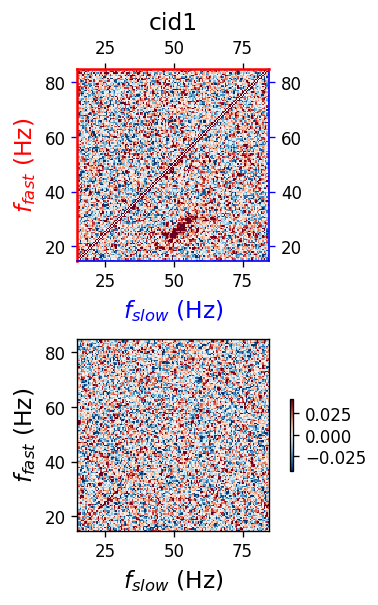

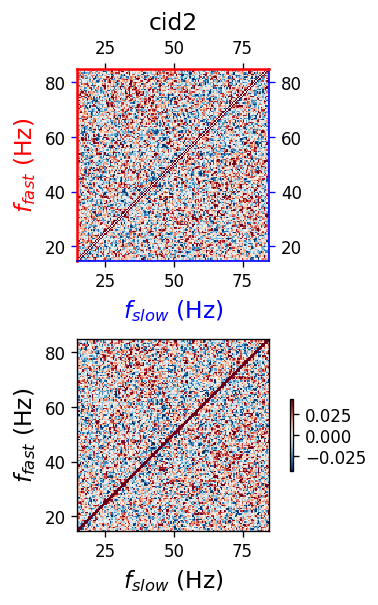

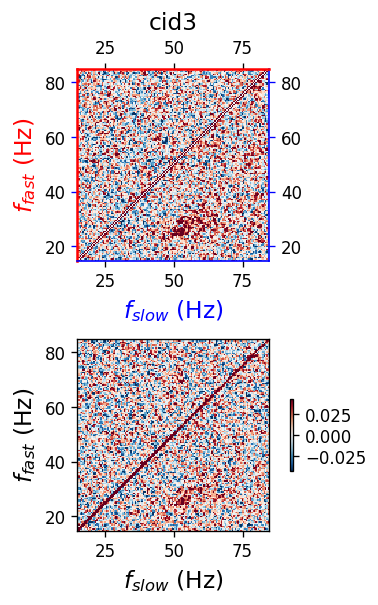

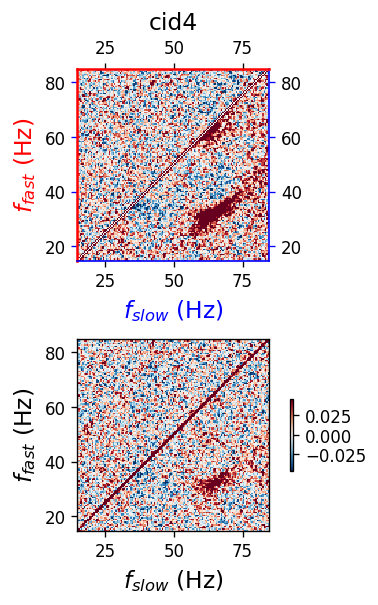

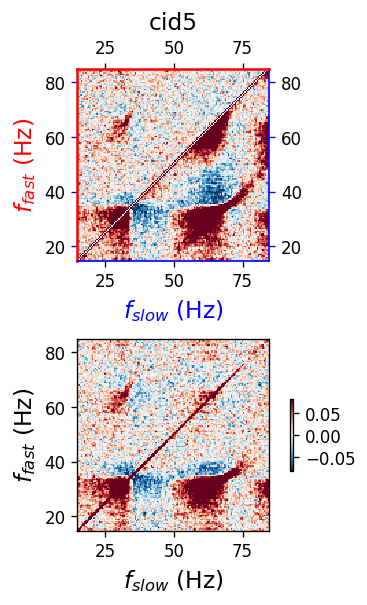

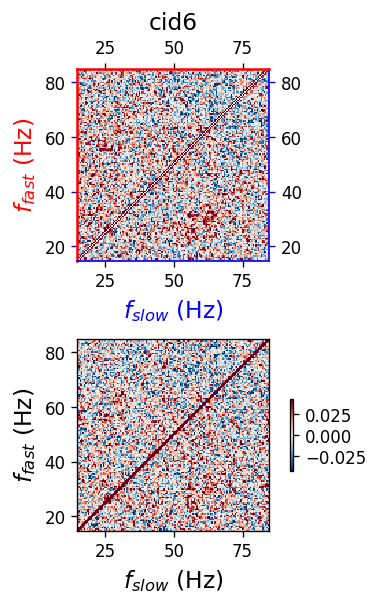

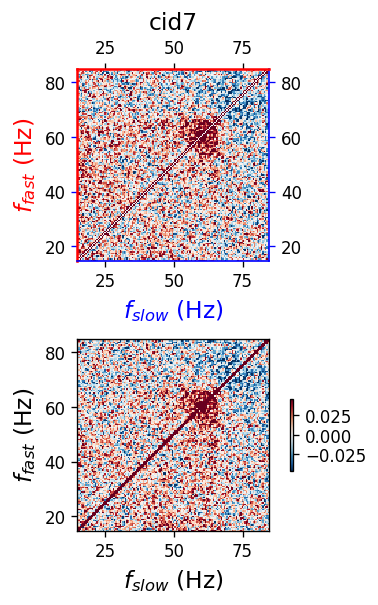

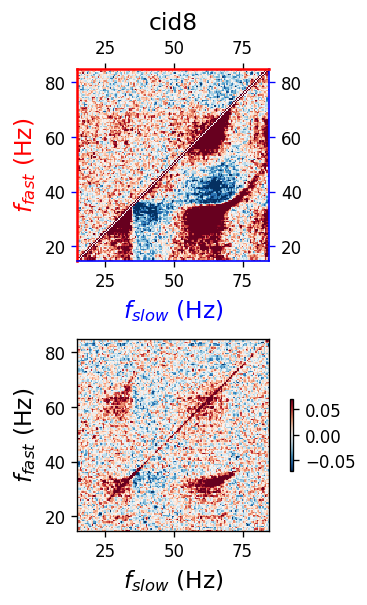

In [514]:
for n in range(8):

    im = corr_data["corr_maps"][n]
    idf = (fpsd >= 15) & (fpsd <= 85)
    im = im[:, idf]
    im = im[:, :, idf]
    vm = np.percentile(np.abs(np.concatenate(im)), 95)

    plt.figure(dpi=120, figsize=(2., 5.))
    show_corr_map(im, fpsd[idf], vm=vm, xl=(10, 90), title="cid%d"%(n+1))
    
    plt.show()

In [524]:
fpsd.shape, corr_tmp.shape

((198,), (8, 4, 48, 48))

In [ ]:
fpsd[idf].shape

(140,)

In [523]:
with open("./corr_maps_tmp.pkl", "rb") as fp:
    corr_tmp = pkl.load(fp)



    im = corr_data["corr_maps"][n]
    idf = (fpsd >= 15) & (fpsd <= 85)
    im = im[:, idf]
    im = im[:, :, idf]
    vm = np.percentile(np.abs(np.concatenate(im)), 95)

    plt.figure(dpi=120, figsize=(2., 5.))
    show_corr_map(im, fpsd[idf], vm=vm, xl=(10, 90), title="cid%d"%(n+1))
    
    plt.show()

In [498]:
detail = sobj.load_detail(0, 100)
psd, fpsd, tpsd = hhsignal.get_stfft(detail["vlfp"][0], detail["ts"], fs, mbin_t=mbin_t, wbin_t=0.3, frange=frange)

In [502]:
n0 = int((np.random.rand() * (tmax - teq - 2*wbin_t) + teq) / mbin_t)
psd_sub = psd[:, n0:n0+int(wbin_t/mbin_t)]
tpsd_sub = tpsd[n0:n0+int(wbin_t/mbin_t)]

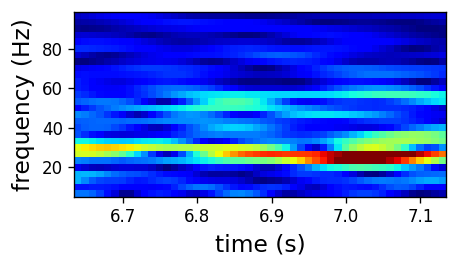

In [508]:
plt.figure(figsize=(4, 2))
# plt.imshow(tpsd_sub, psd_sub, cmap="jet")
hhtools.imshow_xy(psd_sub, x=tpsd_sub, y=fpsd, cmap="jet", interpolation="nearest")
plt.xlabel("time (s)", fontsize=14)
plt.ylabel("frequency (Hz)", fontsize=14)
plt.show()

In [375]:
np.diag(corr_data["corr_maps"][2][0])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

(8, 48, 48)

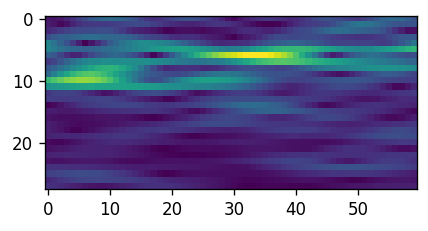

In [125]:
plt.imshow(psd_sub)


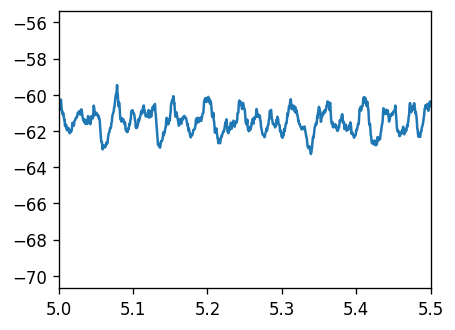

In [522]:
plt.plot(detail["ts"], detail["vlfp"][0])
# plt.xlim([30, 40])
plt.xlim([5, 5.5])
plt.show()

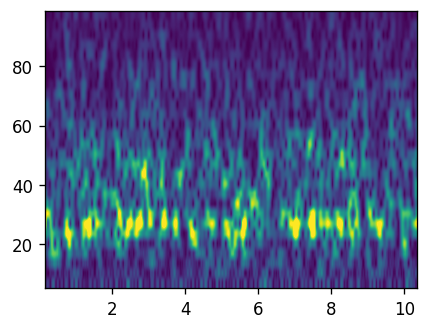

In [117]:
plt.figure()
hhtools.imshow_xy(psd, x=tpsd, y=fpsd)

# population activity correlation

In [263]:
sobj = hhtools.SummaryLoader("./data")

np.random.seed(200)

wbin_t = 0.2

detail = sobj.load_detail(4, 100)
n0 = int((np.random.rand() * (tmax - teq - wbin_t) + teq) * srate)

Load cache file


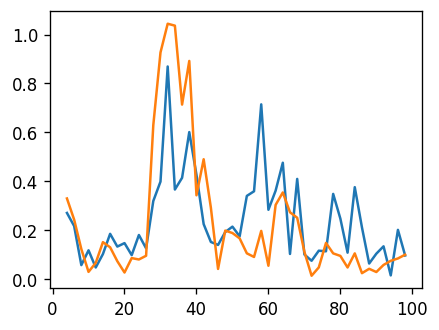

In [275]:
wbin_t = 0.5
wbin = int(wbin_t * 2000)
frange = (2/wbin_t, 100)

for nt in range(1, 3):
    v = detail["vlfp"][nt][n0:n0+wbin]
    yf, fpsd = hhsignal.get_fft(v, 2000, frange=frange)
    
    plt.plot(fpsd, yf)
# v2 = detail["vlfp"][2][n0:n0+wbin]



In [77]:
from numba import jit
from tqdm.notebook import trange


@jit(nopython=True)
def get_bin_id(x, xedges):
    dx = xedges[1] - xedges[0]
    return int((x - xedges[0]) / dx)


def out_range(x, xrange):
    return x < xrange[0] or x >= xrange[1]


np.random.seed(2000)
num_x, num_y= 41, 41
nsample = 100

# Global parameters
tmax = 10.5
teq = 0.5
wbin_t = 0.2
srate = 2000

sobj = hhtools.SummaryLoader("./data")

wbin = int(wbin_t * srate)
cc_edges = np.linspace(0.1, 1, num_x)
tlag_edges = np.linspace(-0.05, 0.05, num_y)
tlag_edges_fine = np.linspace(-0.01, 0.01, num_y)

joint_cc = np.zeros([8, num_y-1, num_x-1]) # # of clusters, ., .
joint_cc_fine = np.zeros([8, num_y-1, num_x-1]) # # of clusters, ., .
for cid in range(1, 9):
    for ni in trange(200, desc="cid%d"%(cid)):
        detail = sobj.load_detail(cid-1, ni)
        vlfp = detail["vlfp"][1:]

        for n in range(nsample):
            n0 = int((np.random.rand() * (tmax - teq - wbin_t) + teq) * srate)

            cc, t = hhsignal.get_correlation(vlfp[0][n0:n0+wbin], vlfp[1][n0:n0+wbin], srate=srate, max_lag=0.05)

            cc_max = np.max(cc)
            tlag_max = t[np.argmax(cc)]

            nx = get_bin_id(cc_max, cc_edges)
            ny = get_bin_id(tlag_max, tlag_edges)
            ny_f = get_bin_id(tlag_max, tlag_edges_fine)
            
            if out_range(nx, [0, num_x-1]): continue
            
            if not out_range(ny, [0, num_y-1]):
                joint_cc[cid-1, ny, nx] += 1
            
            if not out_range(ny_f, [0, num_y-1]):
                joint_cc_fine[cid-1, ny_f, nx] += 1

joint_cc /= np.sum(joint_cc)
joint_cc_fine /= np.sum(joint_cc_fine)

Load cache file


cid1:   0%|          | 0/200 [00:00<?, ?it/s]

cid2:   0%|          | 0/200 [00:00<?, ?it/s]

cid3:   0%|          | 0/200 [00:00<?, ?it/s]

cid4:   0%|          | 0/200 [00:00<?, ?it/s]

cid5:   0%|          | 0/200 [00:00<?, ?it/s]

cid6:   0%|          | 0/200 [00:00<?, ?it/s]

cid7:   0%|          | 0/200 [00:00<?, ?it/s]

cid8:   0%|          | 0/200 [00:00<?, ?it/s]

In [73]:
def get_edge_half(edges):
    return (edges[1:] + edges[:-1])/2


def get_margin(joint):
    return np.sum(joint, axis=0) / np.sum(joint)


def cond_prob(joint, pth=1e-5):
    p_margin = get_margin(joint)
    cond = np.zeros_like(joint)
    for n in range(joint.shape[1]):
        if p_margin[n] < pth:
            continue
        
        cond[:, n] = joint[:, n] / p_margin[n]
    return cond

def log_prob_map(prob, pth=1e-9):
    tmp_prob = prob.copy()
    pmin = np.min(tmp_prob[tmp_prob > pth])
    tmp_prob[tmp_prob < pth] = pmin
    return np.log10(tmp_prob)

array([-4., -3., -2., -1.])

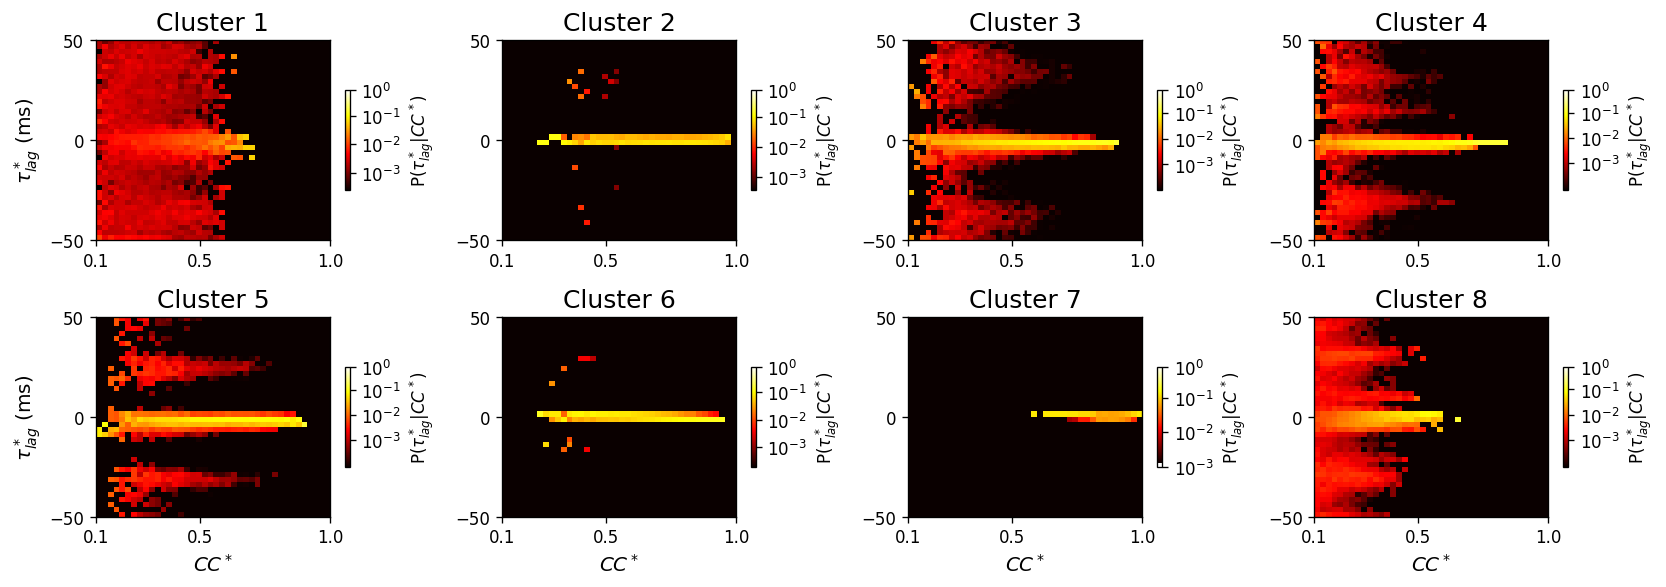

In [104]:
x = get_edge_half(cc_edges)
y = get_edge_half(tlag_edges) * 1e3


plt.figure(figsize=(14, 5), dpi=120)
for nc in range(8):
    plt.subplot(2,4,nc+1)
    log_cond = log_prob_map(cond_prob(joint_cc[nc]))
    hhtools.imshow_xy(log_cond, x=x, y=y,
                      cmap="hot",
                      interpolation="none", vmin=None, vmax=-0.1)
    
    plt.yticks([-50, 0, 50])
    plt.xticks([0.1, 0.5, 1])
    
    cbar = plt.colorbar(shrink=0.5, label=r"P($\tau^*_{lag} | CC^*$)")
    ct = [-0.1, -1, -2, -3]
    cbar.set_ticks(ct)
    cbar.set_ticklabels([r"$10^{%d}$"%(n) for n in ct])
    # print(cbar.get_ticks())
    
    plt.title("Cluster %d"%(nc+1), fontsize=15)
    
    if nc % 4 == 0:
        plt.ylabel(r"$\tau^*_{lag}$ (ms)", fontsize=12)
    
    if nc > 3:
        plt.xlabel(r"$CC^*$", fontsize=12)

        
    # plt.suptitle(r"P($\tau^*_{lag} | CC^*$)", fontsize=15)
    
plt.tight_layout()
plt.show()

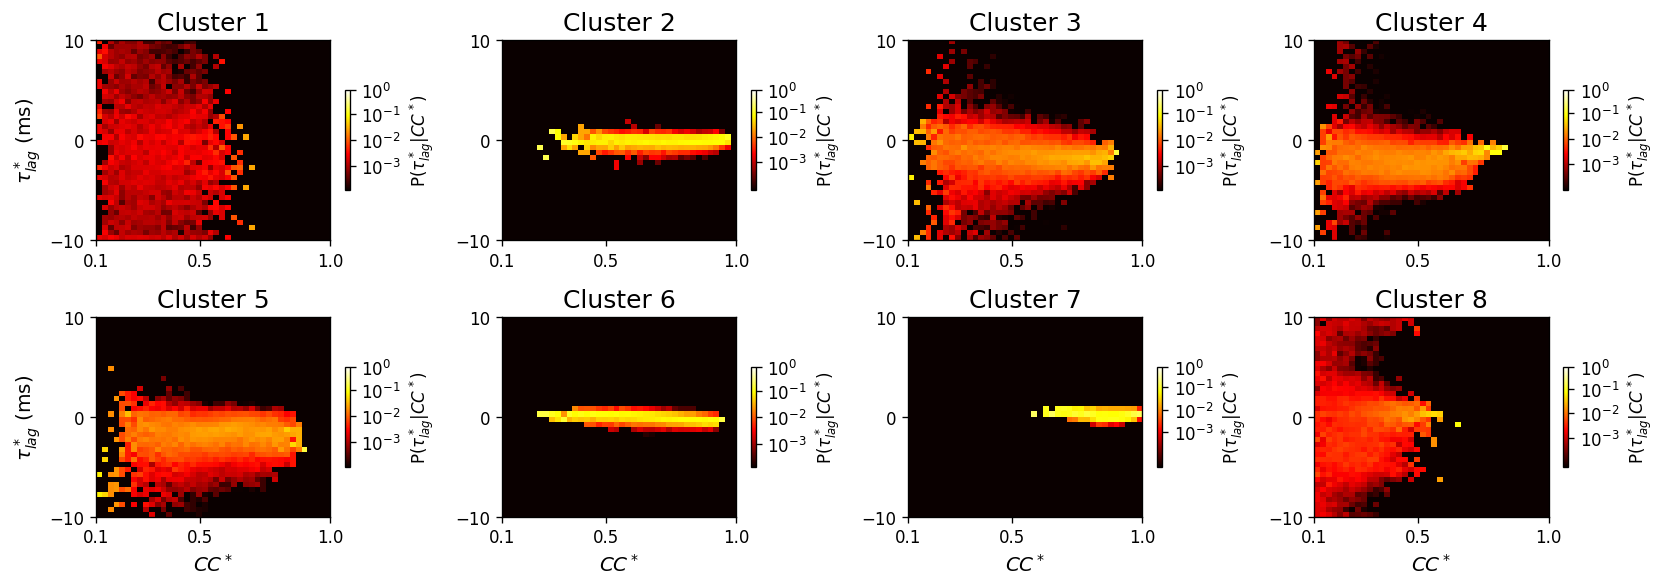

In [106]:
x = get_edge_half(cc_edges)
y = get_edge_half(tlag_edges_fine) * 1e3

plt.figure(figsize=(14, 5), dpi=120)
for nc in range(8):
    plt.subplot(2,4,nc+1)
    log_cond = log_prob_map(cond_prob(joint_cc_fine[nc]))
    hhtools.imshow_xy(log_cond, x=x, y=y,
                      cmap="hot",
                      interpolation="none", vmin=None, vmax=-0.1)
    
    plt.yticks([-10, 0, 10])
    plt.xticks([0.1, 0.5, 1])
    
    cbar = plt.colorbar(shrink=0.5, label=r"P($\tau^*_{lag} | CC^*$)")
    ct = [-0.1, -1, -2, -3]
    cbar.set_ticks(ct)
    cbar.set_ticklabels([r"$10^{%d}$"%(n) for n in ct])
    # print(cbar.get_ticks())
    
    plt.title("Cluster %d"%(nc+1), fontsize=15)
    
    if nc % 4 == 0:
        plt.ylabel(r"$\tau^*_{lag}$ (ms)", fontsize=12)
    
    if nc > 3:
        plt.xlabel(r"$CC^*$", fontsize=12)

        
    # plt.suptitle(r"P($\tau^*_{lag} | CC^*$)", fontsize=15)
    
plt.tight_layout()
plt.show()